<a href="https://colab.research.google.com/github/du-hr/covid-atals/blob/main/MiniProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID Atalas: Analyzing COVID-19 Search Trends and Hospitalization with ML


> MiniProject 1 of COMP 551 (Fall 2020) at McGill University


> Authors (G68): Haoran Du, Cong Zhu, Matthew Kourlas





In [70]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt

## Task 1: Acquire, preprocess, and analyze the data.

### 1.1 Download the datasets. Load the datasets into Pandas dataframes or NumPy objects (i.e., arrays or matrices) in Python.

In [71]:

url_search = "https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/search_trends_symptoms_dataset/United%20States%20of%20America/2020_US_weekly_symptoms_dataset.csv"
url_hospital = "https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/cc_by/aggregated_cc_by.csv"

df_search = pd.read_csv(url_search, low_memory=False)
df_hospital = pd.read_csv(url_hospital, low_memory=False)

pd.set_option('display.max_columns', None)


###1.2 Clean the data. Remove regions and features that have too many missing or invalid data entries.

In [72]:
print("Length of search dataset before cleaning = " + str(len(df_search)))
df_search.dropna(thresh=8, inplace=True)
df_search.dropna(axis=1, how="all", inplace=True)
print("Length of search dataset after cleaning = " + str(len(df_search)))

print("\nLength of hospital dataset before cleaning = " + str(len(df_hospital)))

df_hospital = df_hospital[ (df_hospital["open_covid_region_code"] >= "US-A") & (df_hospital["open_covid_region_code"] <= "US-Z") ]
df_hospital.dropna(axis=1, how="all", inplace=True)
print("Length of hospital dataset after cleaning = " + str(len(df_hospital)))

Length of search dataset before cleaning = 624
Length of search dataset after cleaning = 584

Length of hospital dataset before cleaning = 98946
Length of hospital dataset after cleaning = 12253


###1.3 Merge the two datasets. Bring both the datasets at the weekly resolution and thereafter merge them into one array (Numpy or Pandas).

In [73]:



df_search["date"] = pd.to_datetime(df_search["date"])

df_hospital["date"] = pd.to_datetime(df_hospital["date"])

df_search = df_search.set_index(["date"])
df_search = df_search.shift(periods=6, freq="D")
df_hospital = df_hospital.set_index(["date"])


grouper = df_hospital.groupby([pd.Grouper(freq='1W'), 'open_covid_region_code'])
df_hospital = grouper['hospitalized_new', 'hospitalized_cumulative'].sum()

df_search = df_search.groupby(by=["date", "open_covid_region_code"]).sum()

df_hospital = df_hospital.drop(["2020-10-11", "2020-10-04"])
df_search = df_search.drop(["2020-01-12", "2020-01-19"])

df = pd.concat([df_hospital, df_search], axis=1, sort=False)

df.dropna(thresh=122, inplace=True)

print(df)
# Hi guys, this is the final combined dataset, I set columns "date" and "open_covid_region_code" as the indexes.
# Columns "hospitalized_new" and "hospitalized_cumulative" come from the hospitalization dataset and all other columns come from the search trend dataset.
# Feel free to let me know if you have any questions.




                                   hospitalized_new  hospitalized_cumulative  \
date       open_covid_region_code                                              
2020-03-01 US-RI                                0.0                      0.0   
2020-03-08 US-AK                                0.0                      0.0   
           US-DC                                0.0                      0.0   
           US-DE                                0.0                      0.0   
           US-HI                                0.0                      0.0   
...                                             ...                      ...   
2020-09-27 US-RI                               32.0                  19010.0   
           US-SD                              185.0                   9669.0   
           US-VT                                0.0                      0.0   
           US-WV                                0.0                      0.0   
           US-WY                        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


## Task 2: Visualize and cluster the data

### 2.1 Visualize how the distribution of search frequency of each symptom aggregated across different regions changes over time.

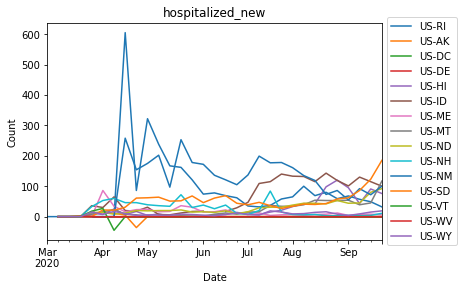

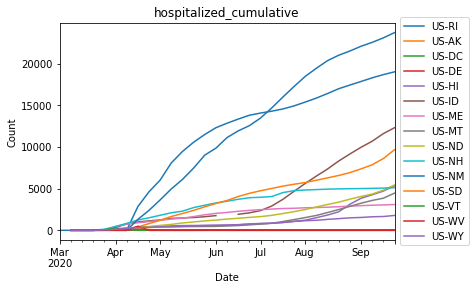

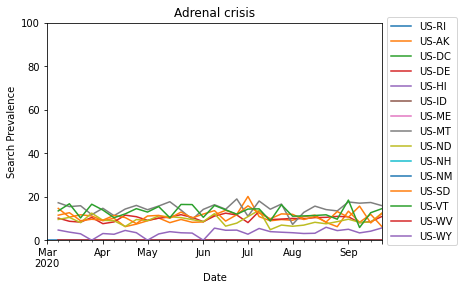

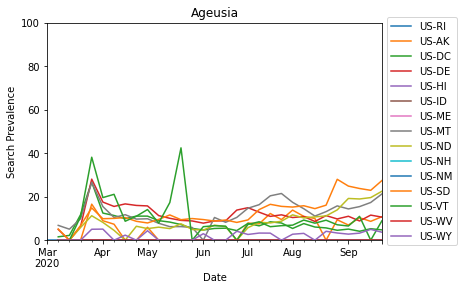

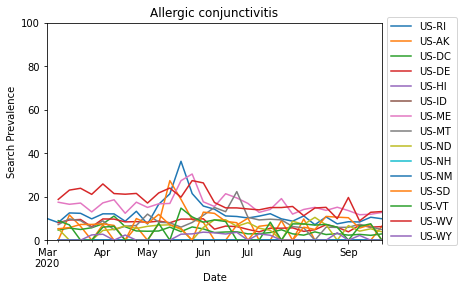

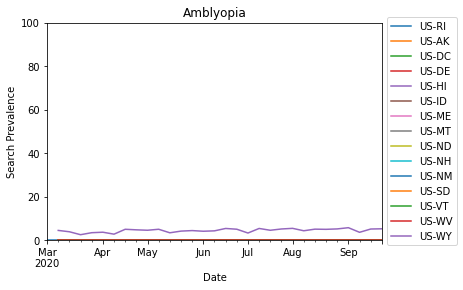

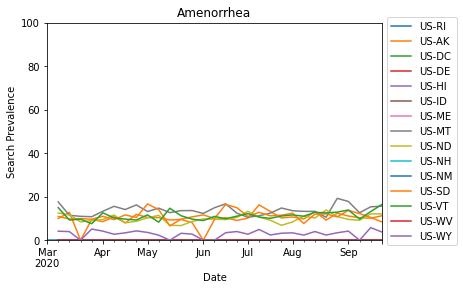

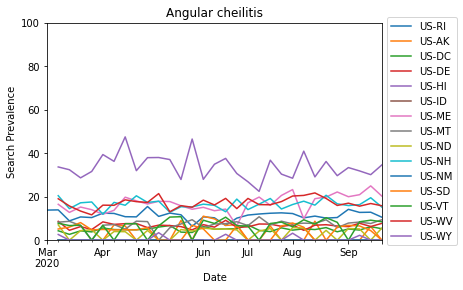

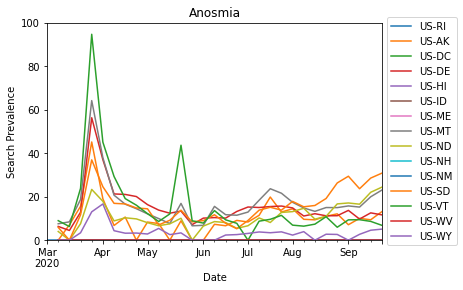

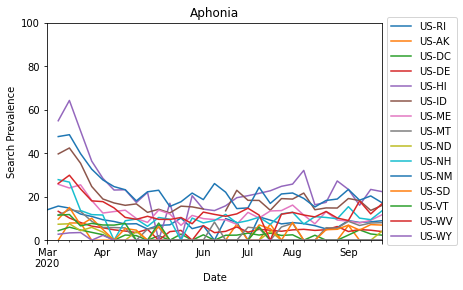

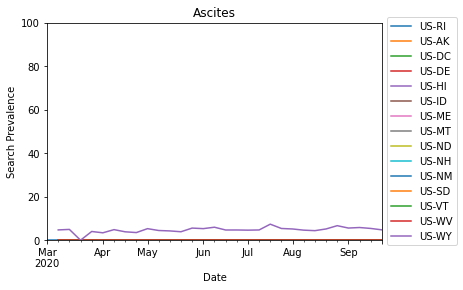

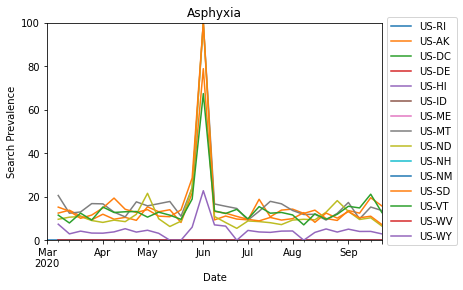

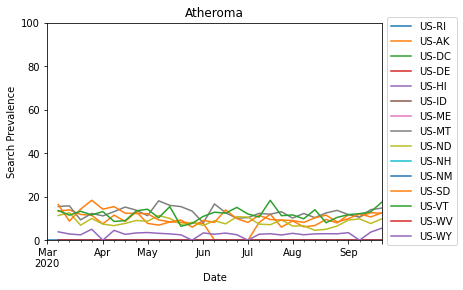

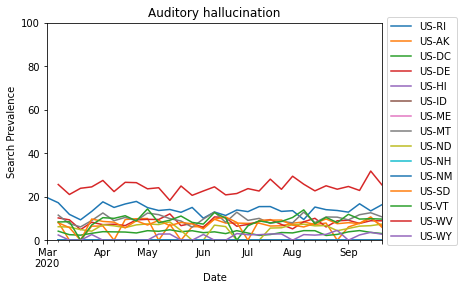

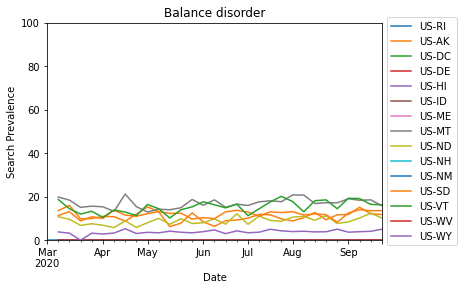

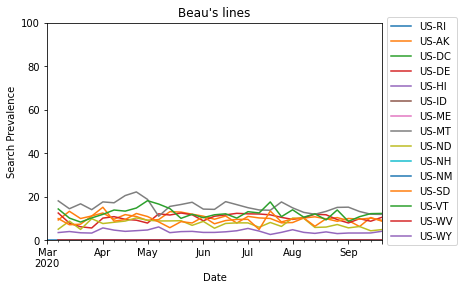

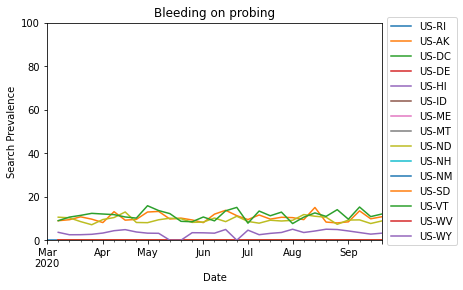

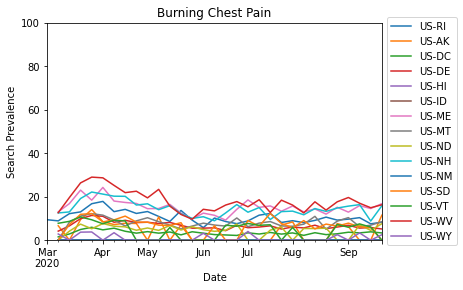

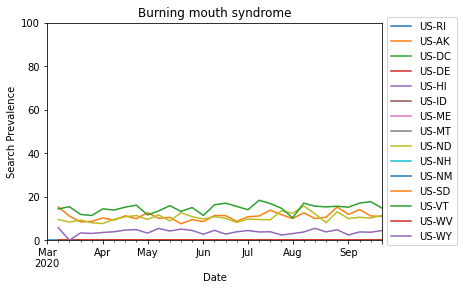

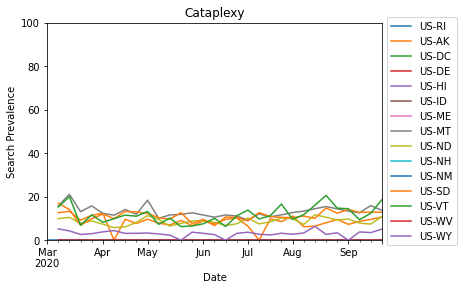

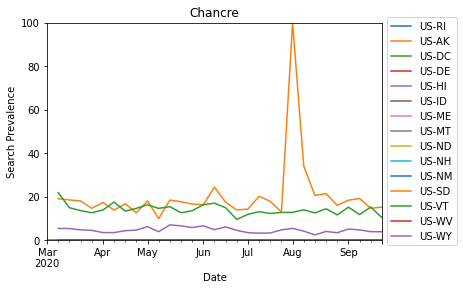

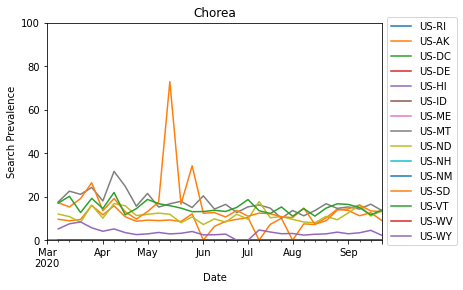

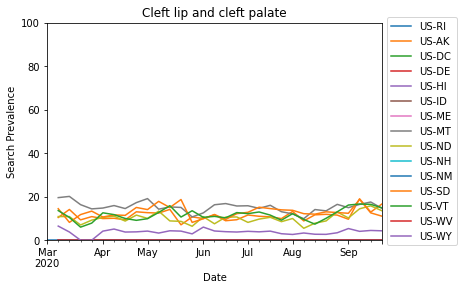

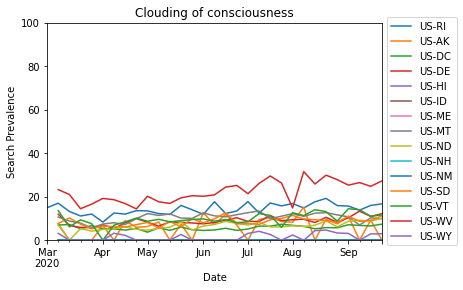

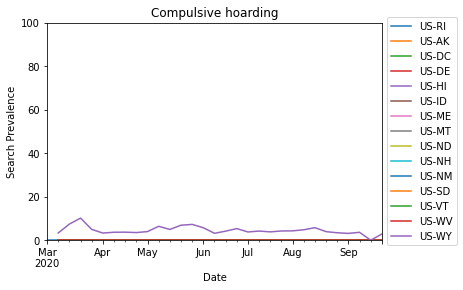

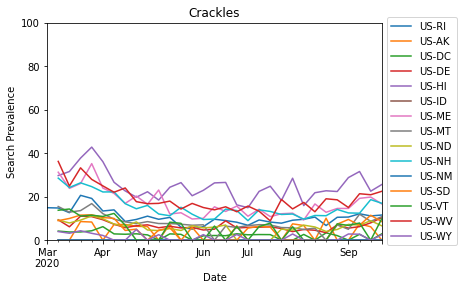

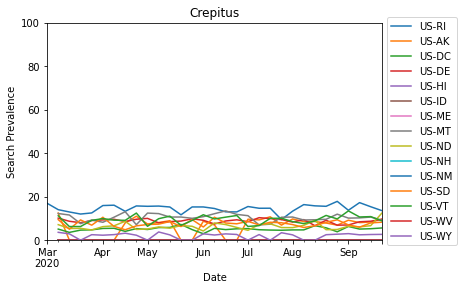

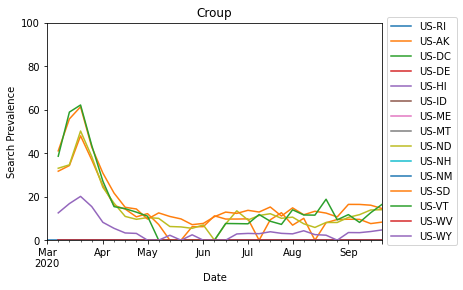

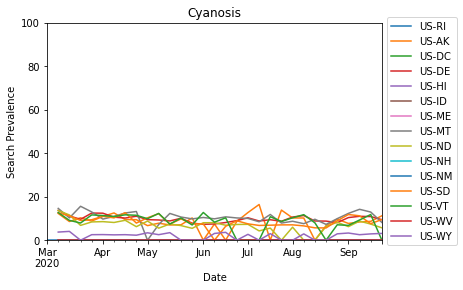

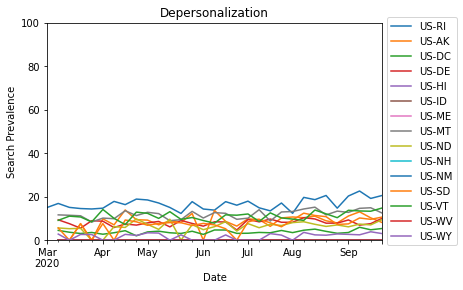

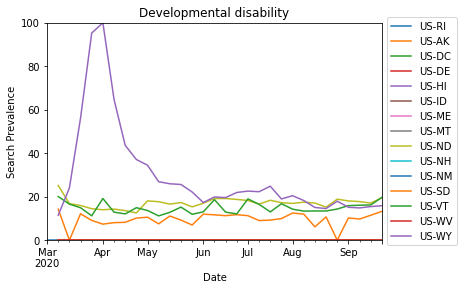

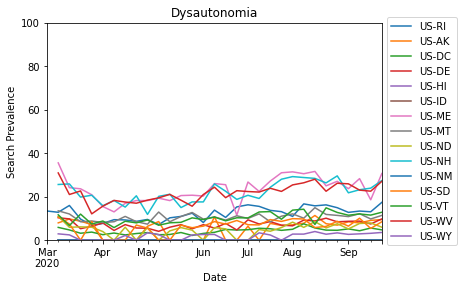

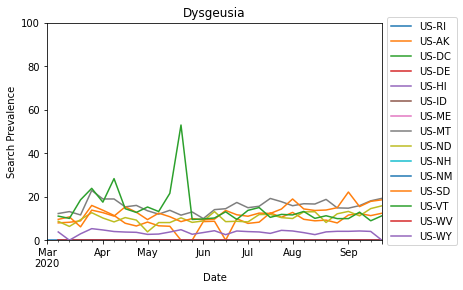

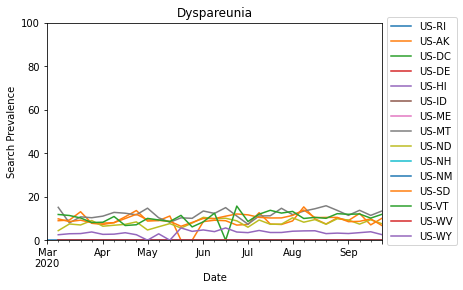

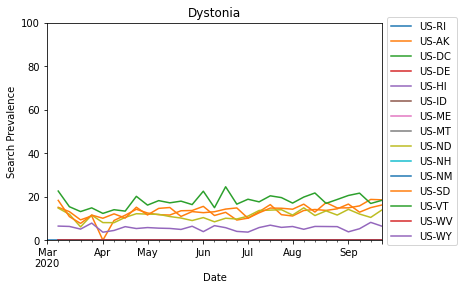

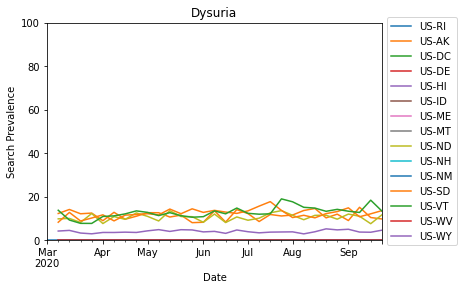

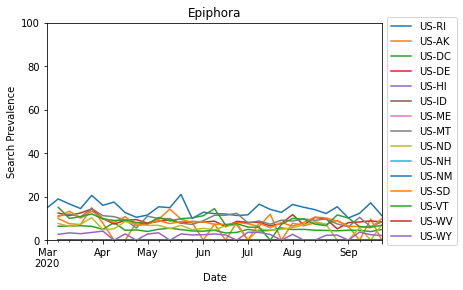

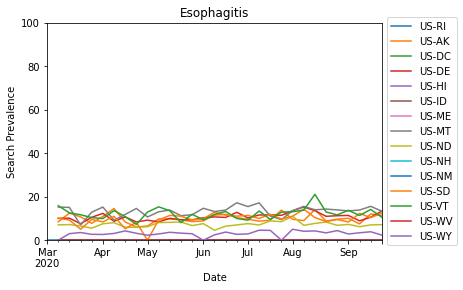

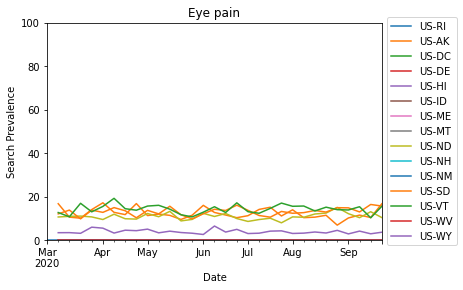

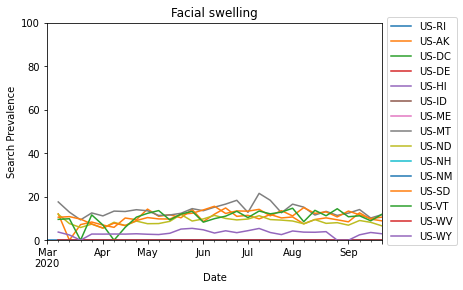

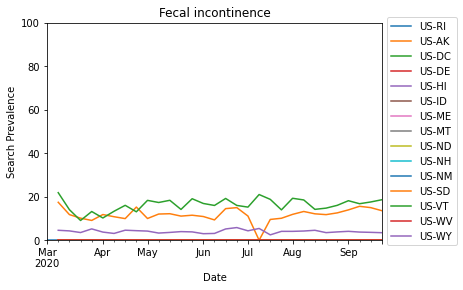

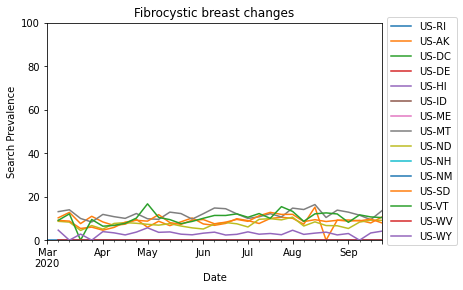

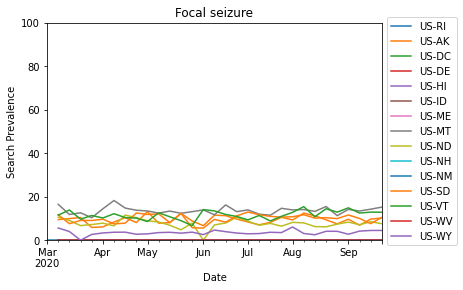

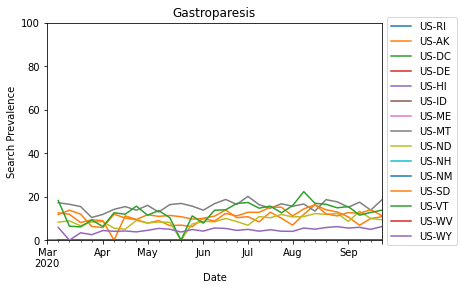

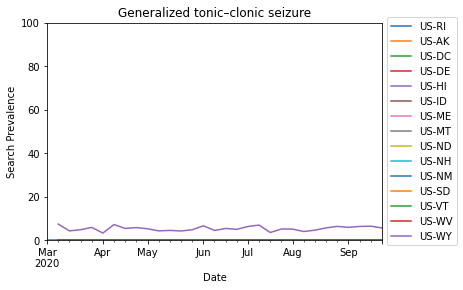

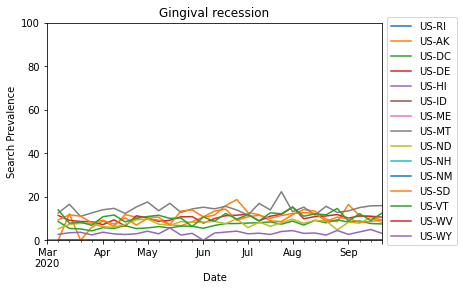

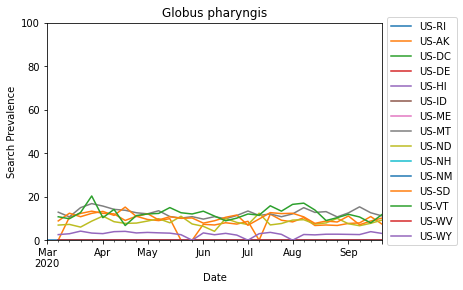

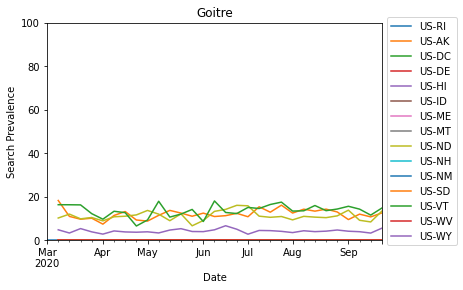

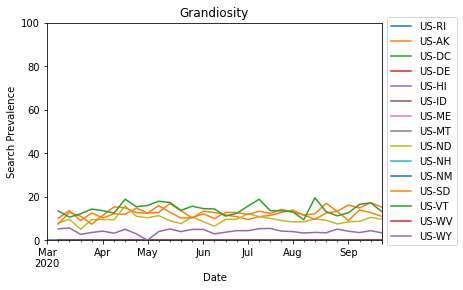

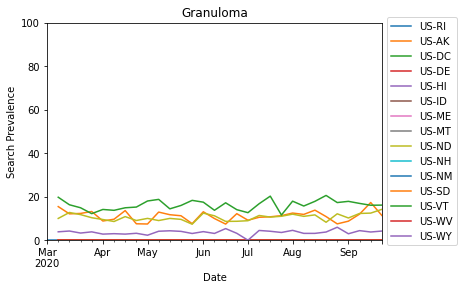

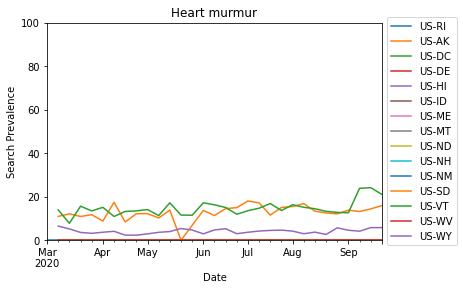

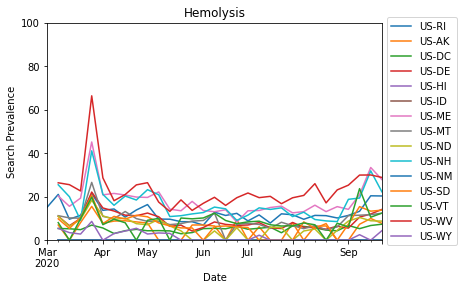

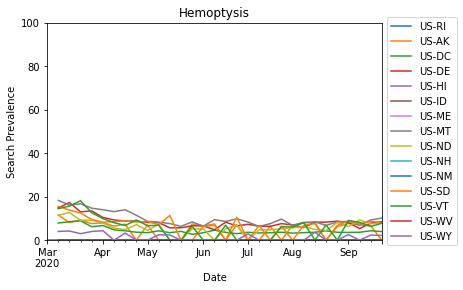

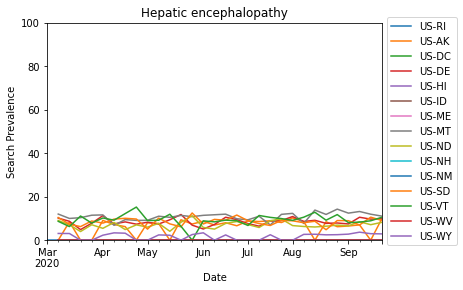

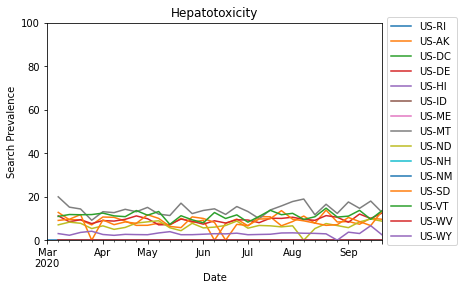

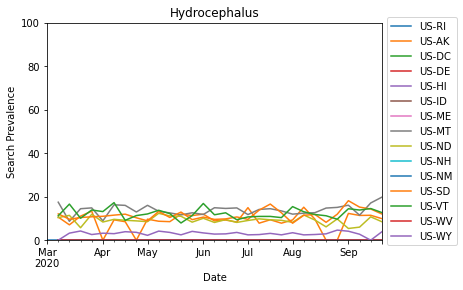

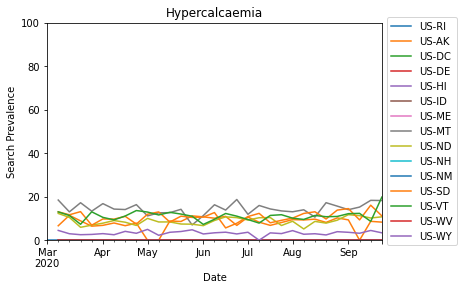

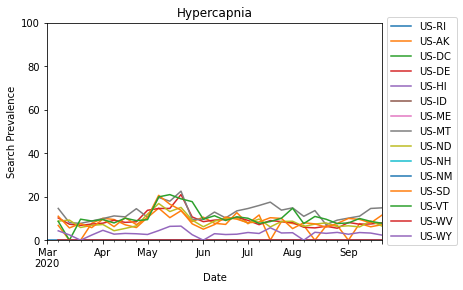

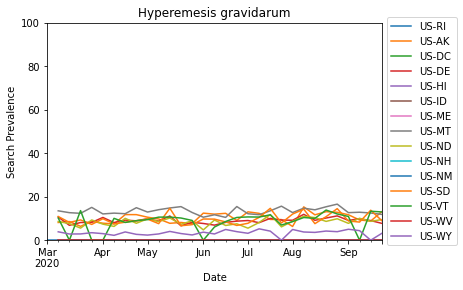

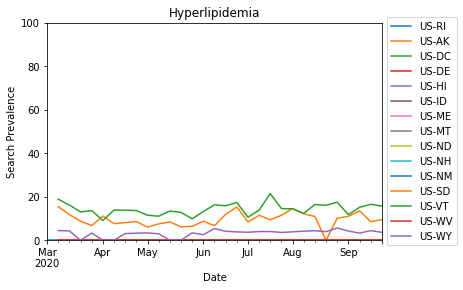

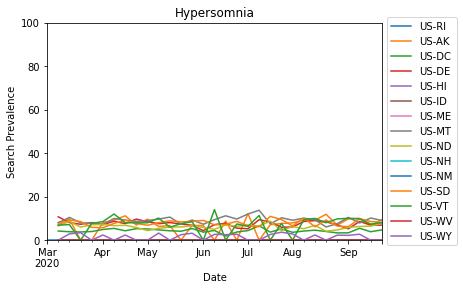

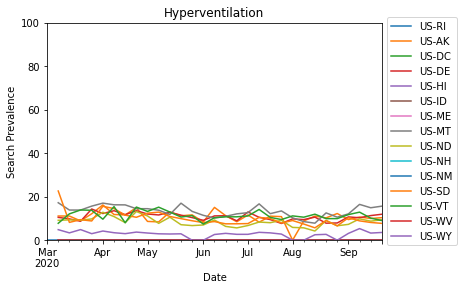

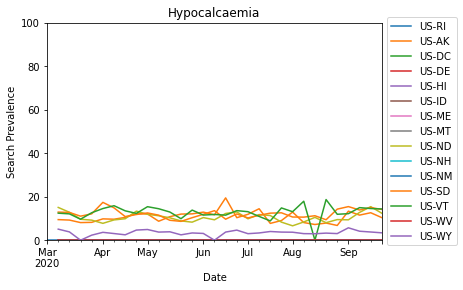

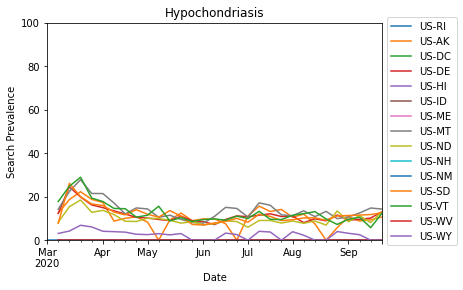

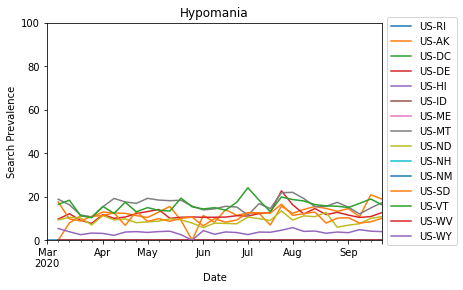

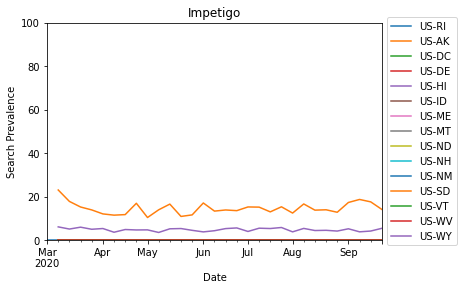

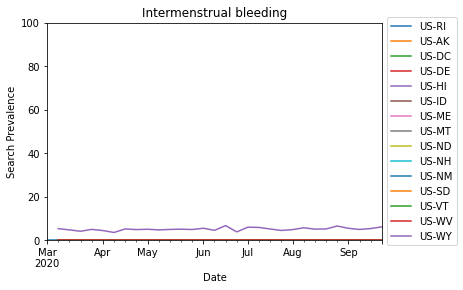

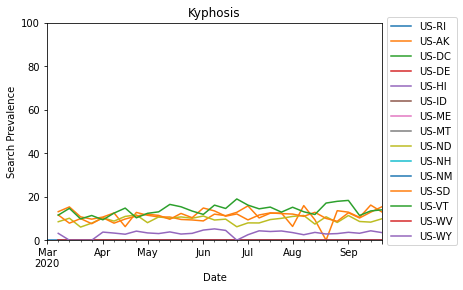

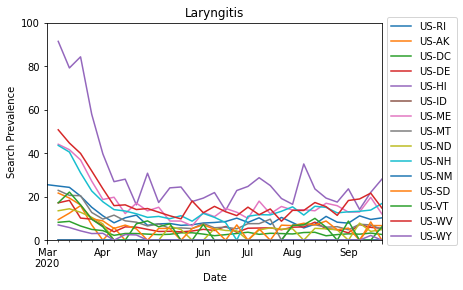

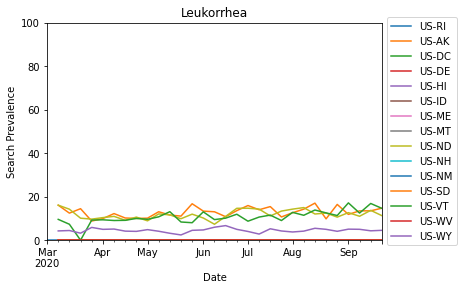

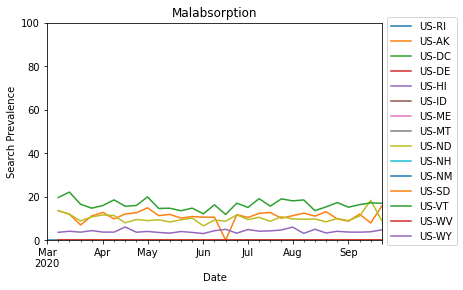

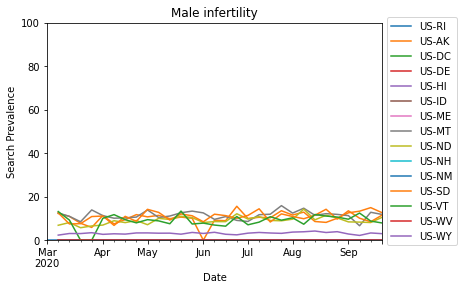

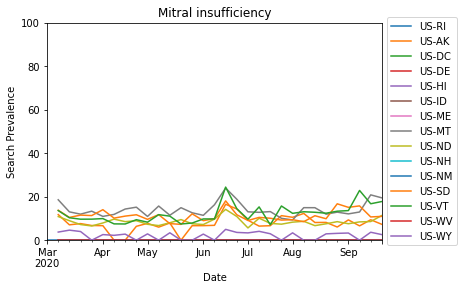

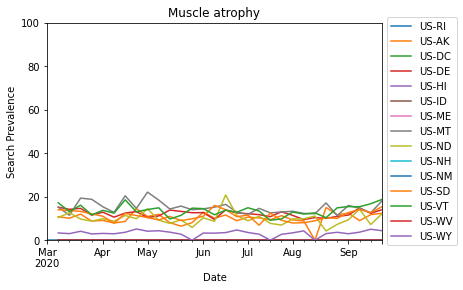

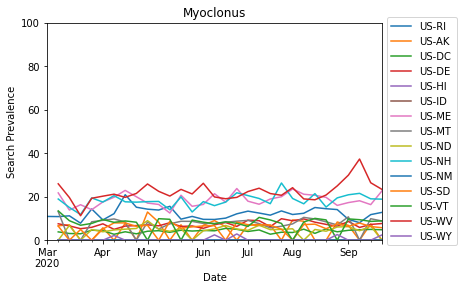

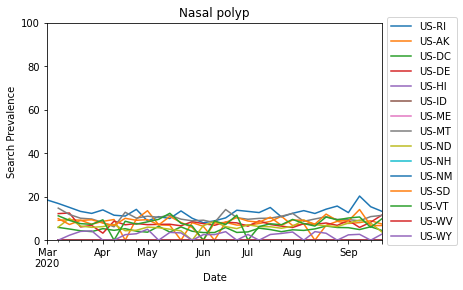

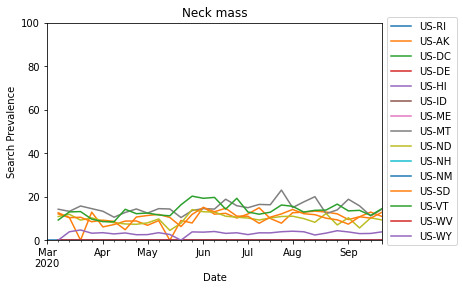

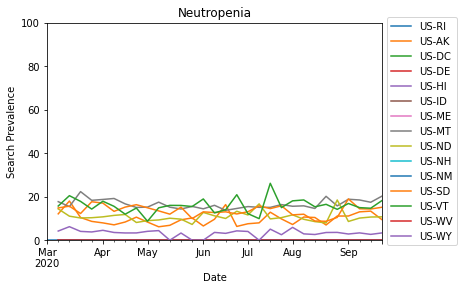

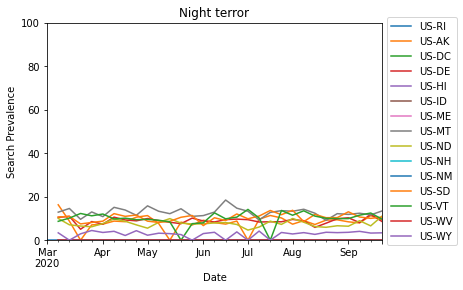

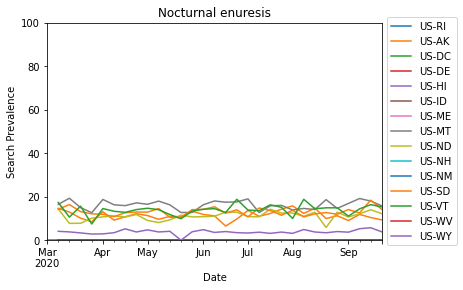

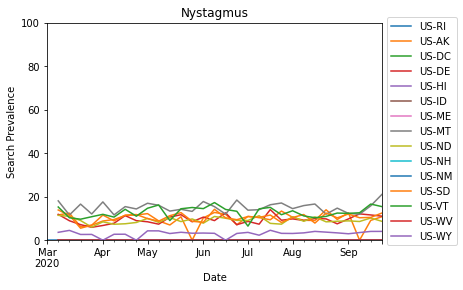

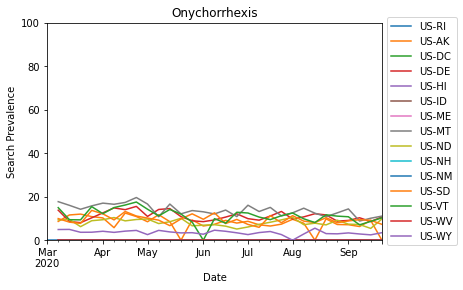

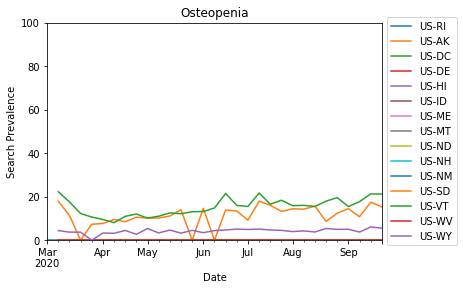

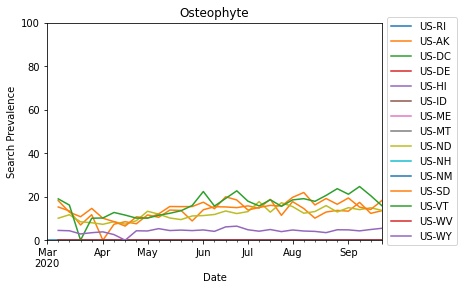

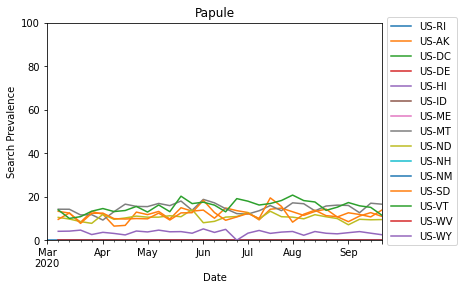

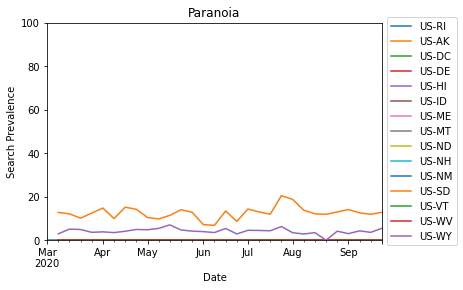

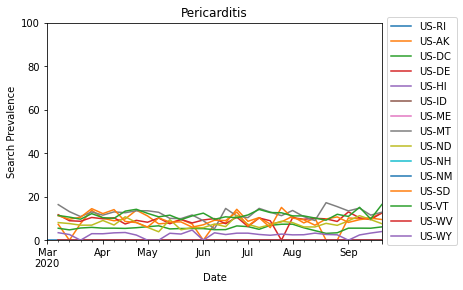

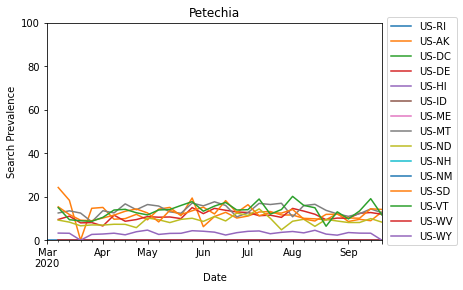

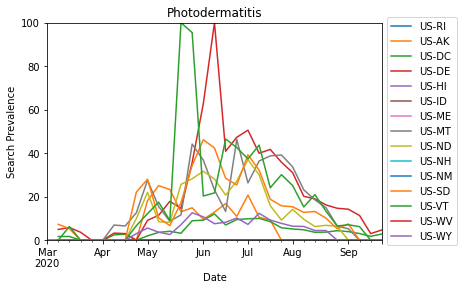

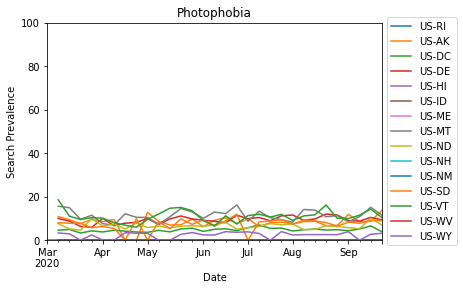

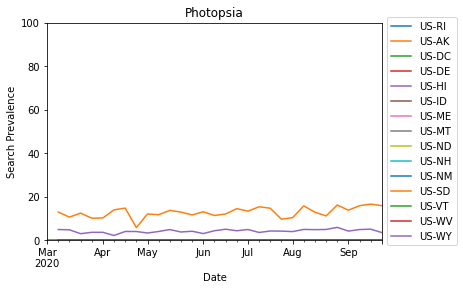

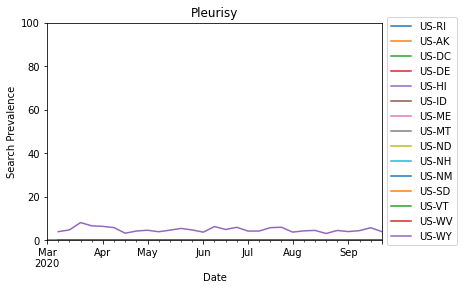

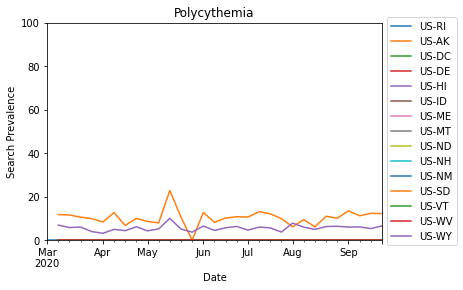

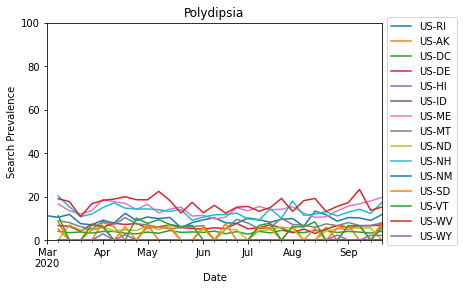

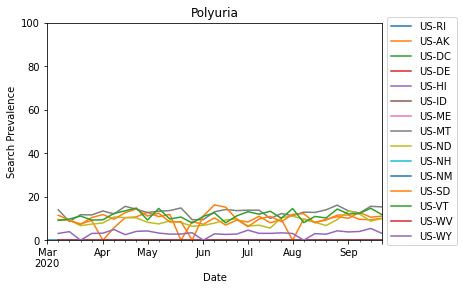

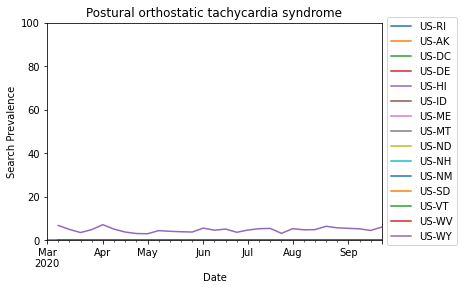

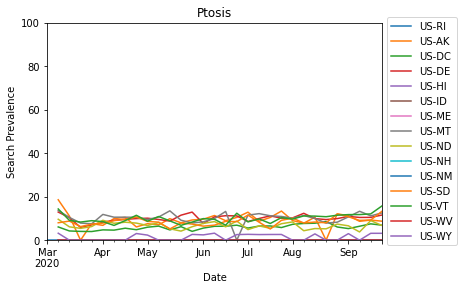

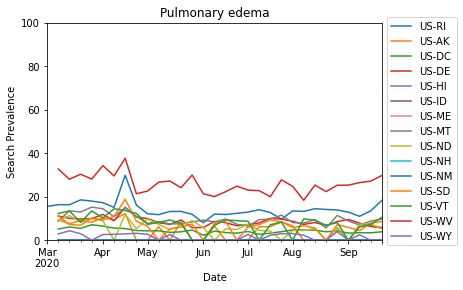

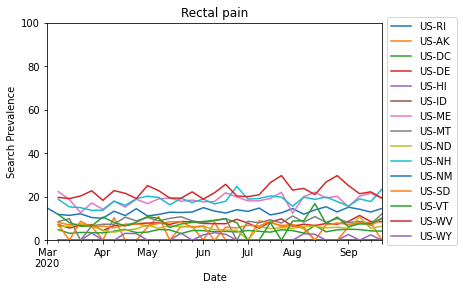

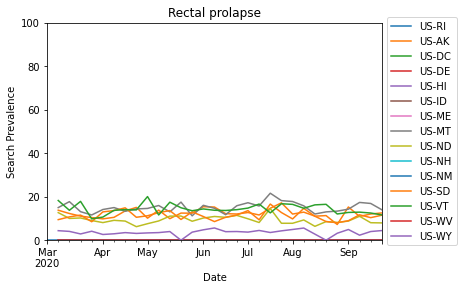

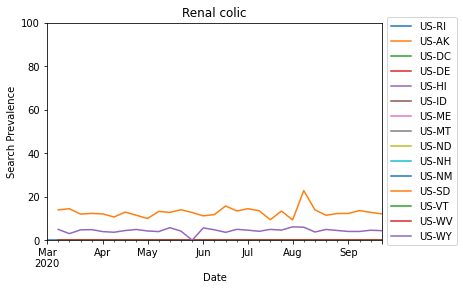

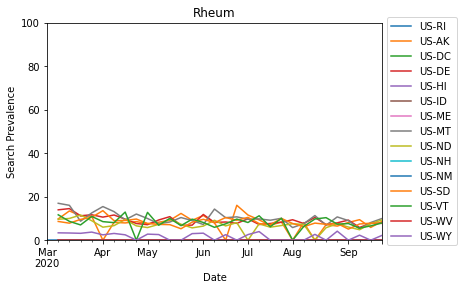

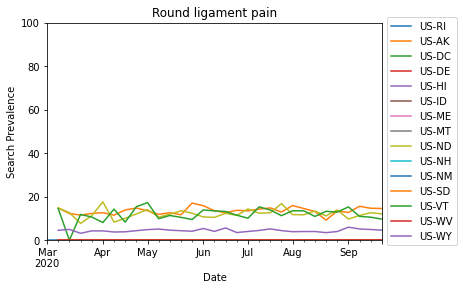

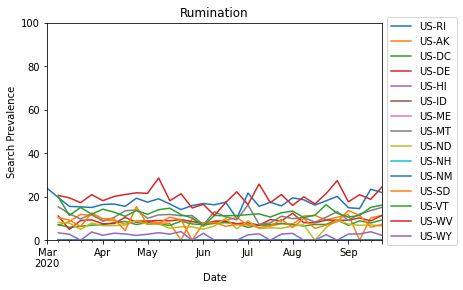

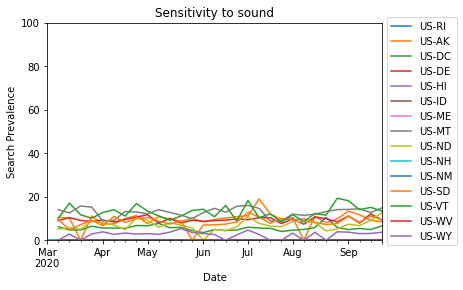

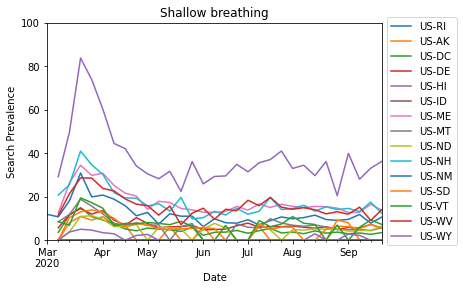

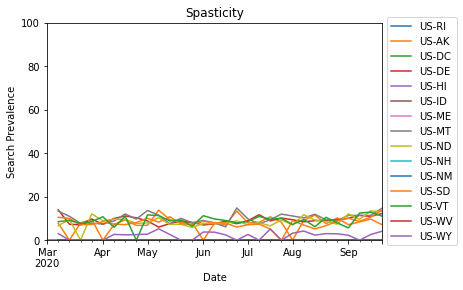

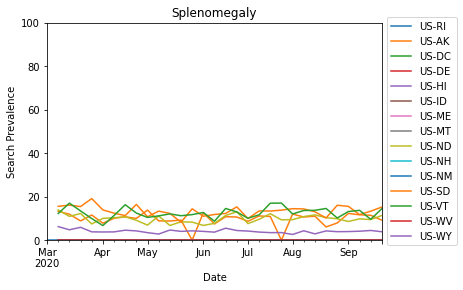

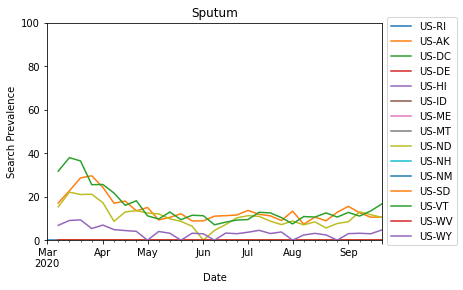

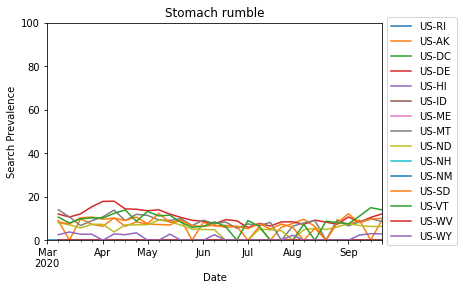

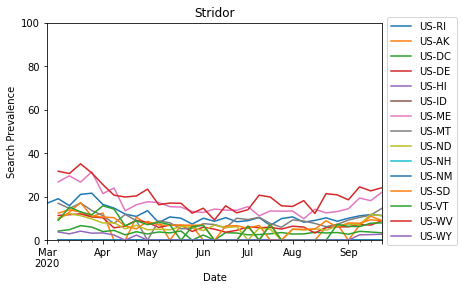

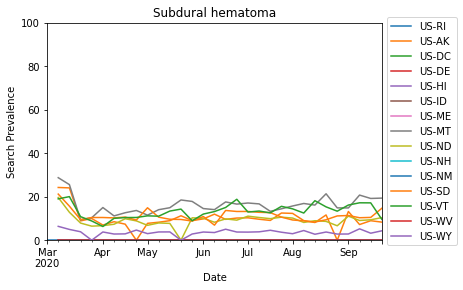

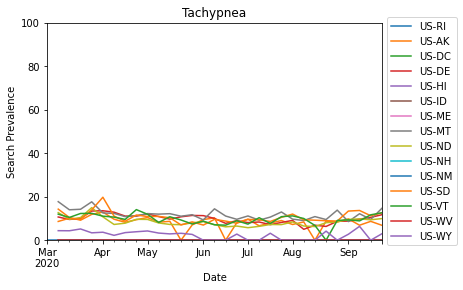

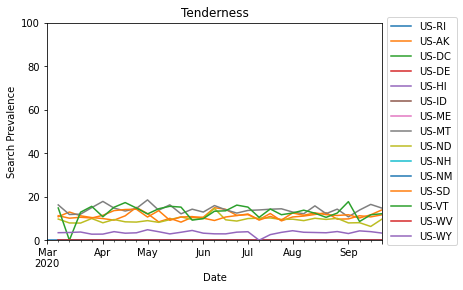

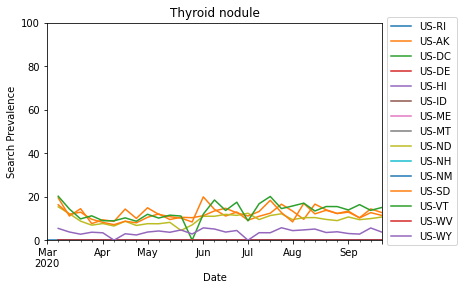

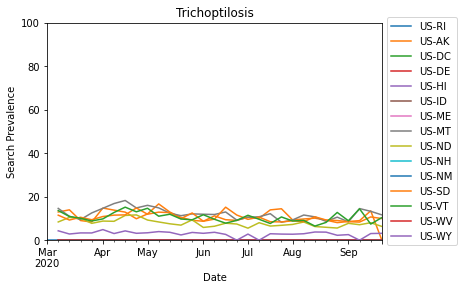

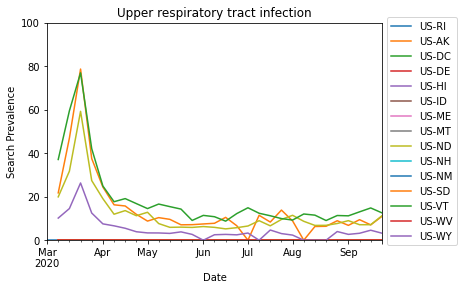

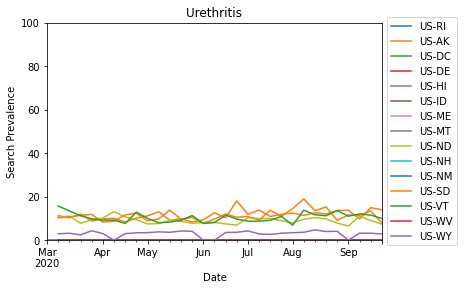

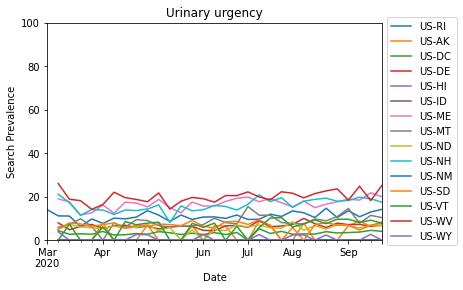

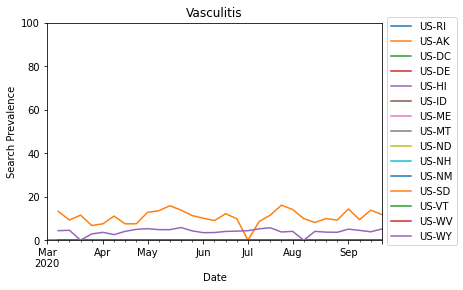

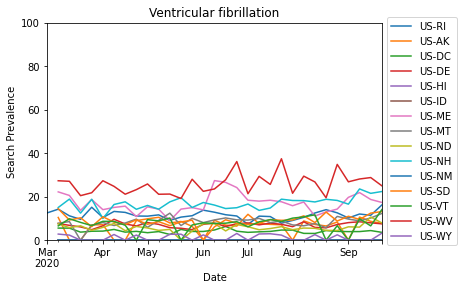

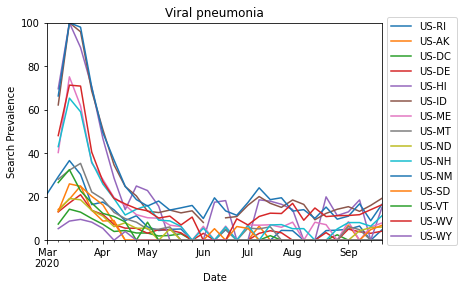

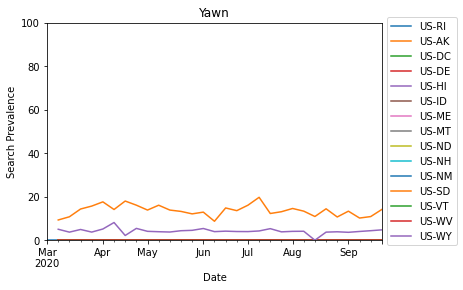

--- Full list of symptoms ---
symptom:Adrenal crisis
symptom:Ageusia
symptom:Allergic conjunctivitis
symptom:Amblyopia
symptom:Amenorrhea
symptom:Angular cheilitis
symptom:Anosmia
symptom:Aphonia
symptom:Ascites
symptom:Asphyxia
symptom:Atheroma
symptom:Auditory hallucination
symptom:Balance disorder
symptom:Beau's lines
symptom:Bleeding on probing
symptom:Burning Chest Pain
symptom:Burning mouth syndrome
symptom:Cataplexy
symptom:Chancre
symptom:Chorea
symptom:Cleft lip and cleft palate
symptom:Clouding of consciousness
symptom:Compulsive hoarding
symptom:Crackles
symptom:Crepitus
symptom:Croup
symptom:Cyanosis
symptom:Depersonalization
symptom:Developmental disability
symptom:Dysautonomia
symptom:Dysgeusia
symptom:Dyspareunia
symptom:Dystonia
symptom:Dysuria
symptom:Epiphora
symptom:Esophagitis
symptom:Eye pain
symptom:Facial swelling
symptom:Fecal incontinence
symptom:Fibrocystic breast changes
symptom:Focal seizure
symptom:Gastroparesis
symptom:Generalized tonic–clonic seizure
symp

In [74]:
# Current visualization strategy: plot features over time (symptom/hospitalization stat) separately from
# each other, but aggregating all regions for each feature

# Choose set of symptoms to plot (ex. symptoms = ['symptom:Balance disorder', 'symptom:Rheum'])
# Graphing all symptoms for now, takes several minutes
symptoms = [symptom for symptom in df.columns.values if symptom.startswith('symptom')]

unstacked = df.unstack(level=[1])

# Generate hospitalization plots (not required by project, just for our benefit)
for stat in {'hospitalized_new', 'hospitalized_cumulative'}:
    p = unstacked[stat].plot()
    p.set_title(stat)
    p.set_xlabel("Date")
    p.set_ylabel("Count")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Generate symptom plots
for symptom in symptoms:
    p = unstacked[symptom].plot()
    p.set_title(symptom[8:])  # remove 'symptom:' prefix
    p.set_xlabel("Date")
    p.set_ylabel("Search Prevalence")
    plt.ylim((0,100)) # search prevalence ranges from 0 to 100
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

# Print full list of symptoms    
print("--- Full list of symptoms ---")
for symptom in symptoms:
    print(symptom)

###2.2 Use Principal Component Analysis (PCA) to reduce the data dimensionality.

In [69]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# PCA Projection to 1 PC
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# reduced dataframe
df_copy = df.reset_index()
df_reduced = pd.concat([principalDf, df_copy[['hospitalized_new']]], axis = 1)
print(df_reduced)



     principal component 1  principal component 2  hospitalized_new
0                -5.697338              -3.119986               0.0
1                14.212675               6.554208               0.0
2                -5.002889               0.032335               0.0
3                 1.098805              -4.856952               0.0
4                -7.517163               0.937703               0.0
..                     ...                    ...               ...
445              -5.682768              -2.891729              32.0
446              10.186469              -3.745095             185.0
447              15.263355               0.451908               0.0
448              -6.834679              -4.343307               0.0
449               0.190533               8.272682              19.0

[450 rows x 3 columns]


###2.3 Explore using a clustering method (k-means) to evaluate possible groups in the search trends dataset. Do the clusters remain consistent for raw as well as PCA-reduced data?

In [ ]:
# Based on KMeans from in-class implementation
class KMeans:
    def __init__(self, k=5, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    # takes ndarray as input
    def fit(self, x):
        # get number of points and dimensionality
        n,d = x.shape

        # assign random points in x as centers
        c = x[np.random.choice(n, self.k, replace=False)]

        for _ in range(self.max_iters):
            # get distances to each center
            dist = np.sum((c[None,:,:] - x[:,None,:])**2, -1)

            # get center membership of each point
            memb = np.argmin(distances, 1)

            # find new centers
            c_new = c.copy()
            for i in range(self.k):
                c_new[i,:] = np.mean(x[memb==i], 0)

            # stop if convergence achieved
            if np.allclose(c_new, c):
                break
            
            # update centers
            c = c_new
        return c, memb


## Task 3: Supervised Learning

###3.1 Split the data (region): keep all data from some regions in the validation set and train on the rest (keep 80% regions in training set and 20% in validation set, doing this multiple times to estimate cross-validation results).

###3.2 Split the data (time): keep data for the last couple of timepoints (keep data after `2020-08-10') from all regions in the validation set and train on the rest of the data.

### 3.3 Supervised Learning: KNN (region) (5-fold cross-validation)

###3.4 Supervised Learning: KNN (time)

###3.5 Supervised Learning: Decision Tree (region) (5-fold cross-validation)

###3.6 Supervised Learning: Decision Tree (time)

### 3.7 **(Optional)** Explore other prediction strategies. For example, one strategy could be to learn separate models for predicting hospitalization in each region or cluster from Task 2.